# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>

### LEITURA DOS DADOS

In [55]:
#pip install pandas
import pandas as pd

"""Por padrão o csv utiliza a como delimitador a virgula"""
clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';') 
funcionario_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',' )
base_serviços = pd.read_excel('BaseServiçosPrestados.xlsx')

display(clientes_df)
display(funcionario_df)
display(base_serviços)

clientes_df.info()
funcionario_df.info()
base_serviços.info()

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null   

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

In [56]:
funcionario_df['Salario_Total'] = funcionario_df['Salario Base'] + funcionario_df['Beneficios'] + funcionario_df['Impostos']
#soma de todos os salarios
funcionario_df['Salario_Total'].sum()


print('A soma da folha salarial mensal é: {}'.format(funcionario_df['Salario_Total'].sum()))

#printar sem escrever print
funcionario_df

A soma da folha salarial mensal é: 2614343.3


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salario_Total
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,37247.0
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9186.8
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,27312.2
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36218.5
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,8666.6
...,...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística,18348.1
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial,6881.6
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo,41813.2
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial,8632.6


2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [57]:
faturamento_tota_df = base_serviços[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on = 'ID Cliente')
faturamento_tota_df ['faturamento_total'] = faturamento_tota_df['Tempo Total de Contrato (Meses)'] * faturamento_tota_df['Valor Contrato Mensal']
print('O Faturamento total de todos foi de: {:.2f}'.format(faturamento_tota_df['faturamento_total'].sum()))
faturamento_tota_df

O Faturamento total de todos foi de: 5519160.00


,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,faturamento_total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


3. Qual o % de funcionários que já fechou algum contrato?<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>

In [62]:
qtd_funcionario_vendeu = len(base_serviços['ID Funcionário'].unique())
qtd_funcionario_empresa = len(funcionario_df['ID Funcionário'].unique())

print(f'a porcentagem de funcionarios de: {qtd_funcionario_vendeu/qtd_funcionario_empresa:.2%}')



a porcentagem de funcionarios de: 86.84%


### 4. Calcule o total de contratos que cada área da empresa já fechou


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64

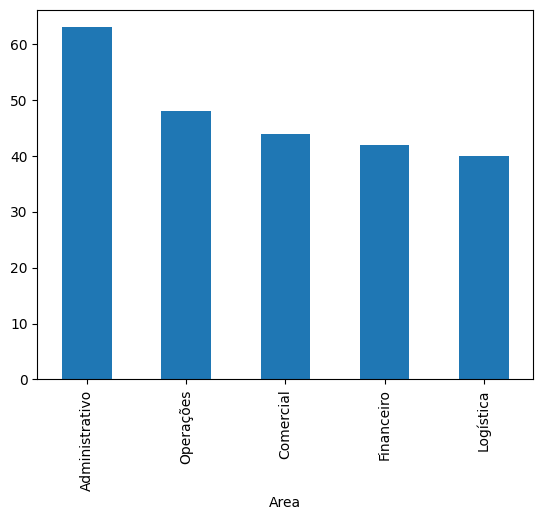

In [72]:


contrato_area_df = base_serviços[['ID Funcionário']].merge(funcionario_df[['ID Funcionário','Area']], on = 'ID Funcionário')

contrato_area_df = contrato_area_df['Area'].value_counts()

contrato_area_df.plot(kind='bar')

display(contrato_area_df)



### 5. Calcule o total de funcionários por área


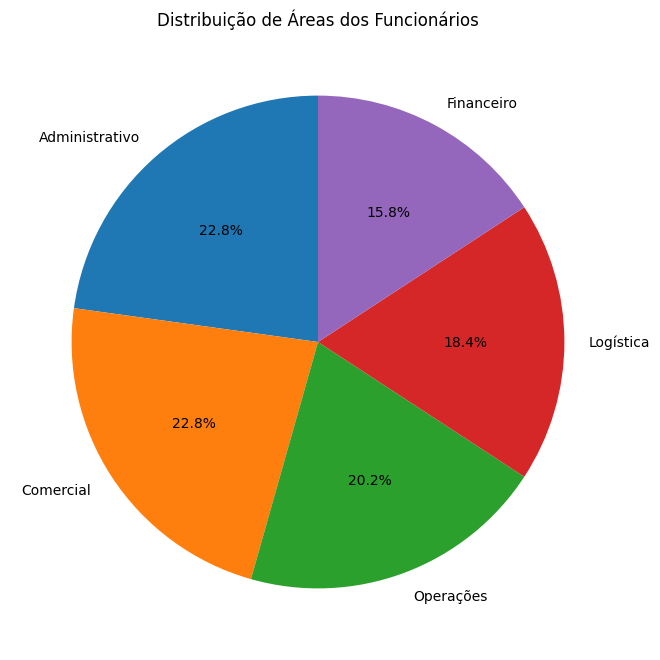

In [86]:
import matplotlib.pyplot as plt
total_area_df = funcionario_df['Area'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
total_area_df.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Áreas dos Funcionários')
plt.ylabel('')  
plt.show()


### 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>


In [ ]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print(f'Ticket médio mensal e: R$')